# Bank Client Churn EDA and Prediction Model 

### Objective:

This project seeks to do a brief in-depth analysis of customers parting a bank obtained from a sample dataset. Later on, it seeks to study, develop and impelement a machine learning algorithm to predict the chances of a customer staying or remaining at the bank.

### Table of Contents:
1. Loading the required libraries
2. Loading the dataset
3. Data Wrangling
4. Exploratory Data Analysis
5. Building the model.
6. Conclusion.
7. Application.

### Loading the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\Bank Customer Churn\Customer-Churn-Records.csv")

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_80512\953126538.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\Bank Customer Churn\Customer-Churn-Records.csv")


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### Data Wrangling

In [5]:
## checking for any duplicates

df.duplicated().sum()

0

In [6]:
## Renaming specific columns

df = df.rename(columns = {
    "IsActiveMember" : "Member Status",
    "CreditScore" : "Credit Score",
    "EstimatedSalary": "Salary Estimate",
    "HasCrCard" : "Credit Card Ownership",
    "Geography" : "Country"
})

In [7]:
## dropping unwanted columns 

df= df.drop(["RowNumber"], axis = 1)

df.shape

(10000, 17)

### Exploratory Data Analysis

In [8]:
## total number of customers

print("No of Customers:", df["CustomerId"].count())

No of Customers: 10000


In [9]:
## number of countries

countries = pd.DataFrame(df["Country"].unique())
countries = countries.rename(columns = {0: "Country"})
print("No of Countries:", countries["Country"].value_counts().sum())

No of Countries: 3


In [10]:
## number of credit card types

types = pd.DataFrame(df["Card Type"].unique())
types = types.rename(columns = {0: "Credit Card Types"})
print("No of Credit Card Types:", types["Credit Card Types"].value_counts().sum())

No of Credit Card Types: 4


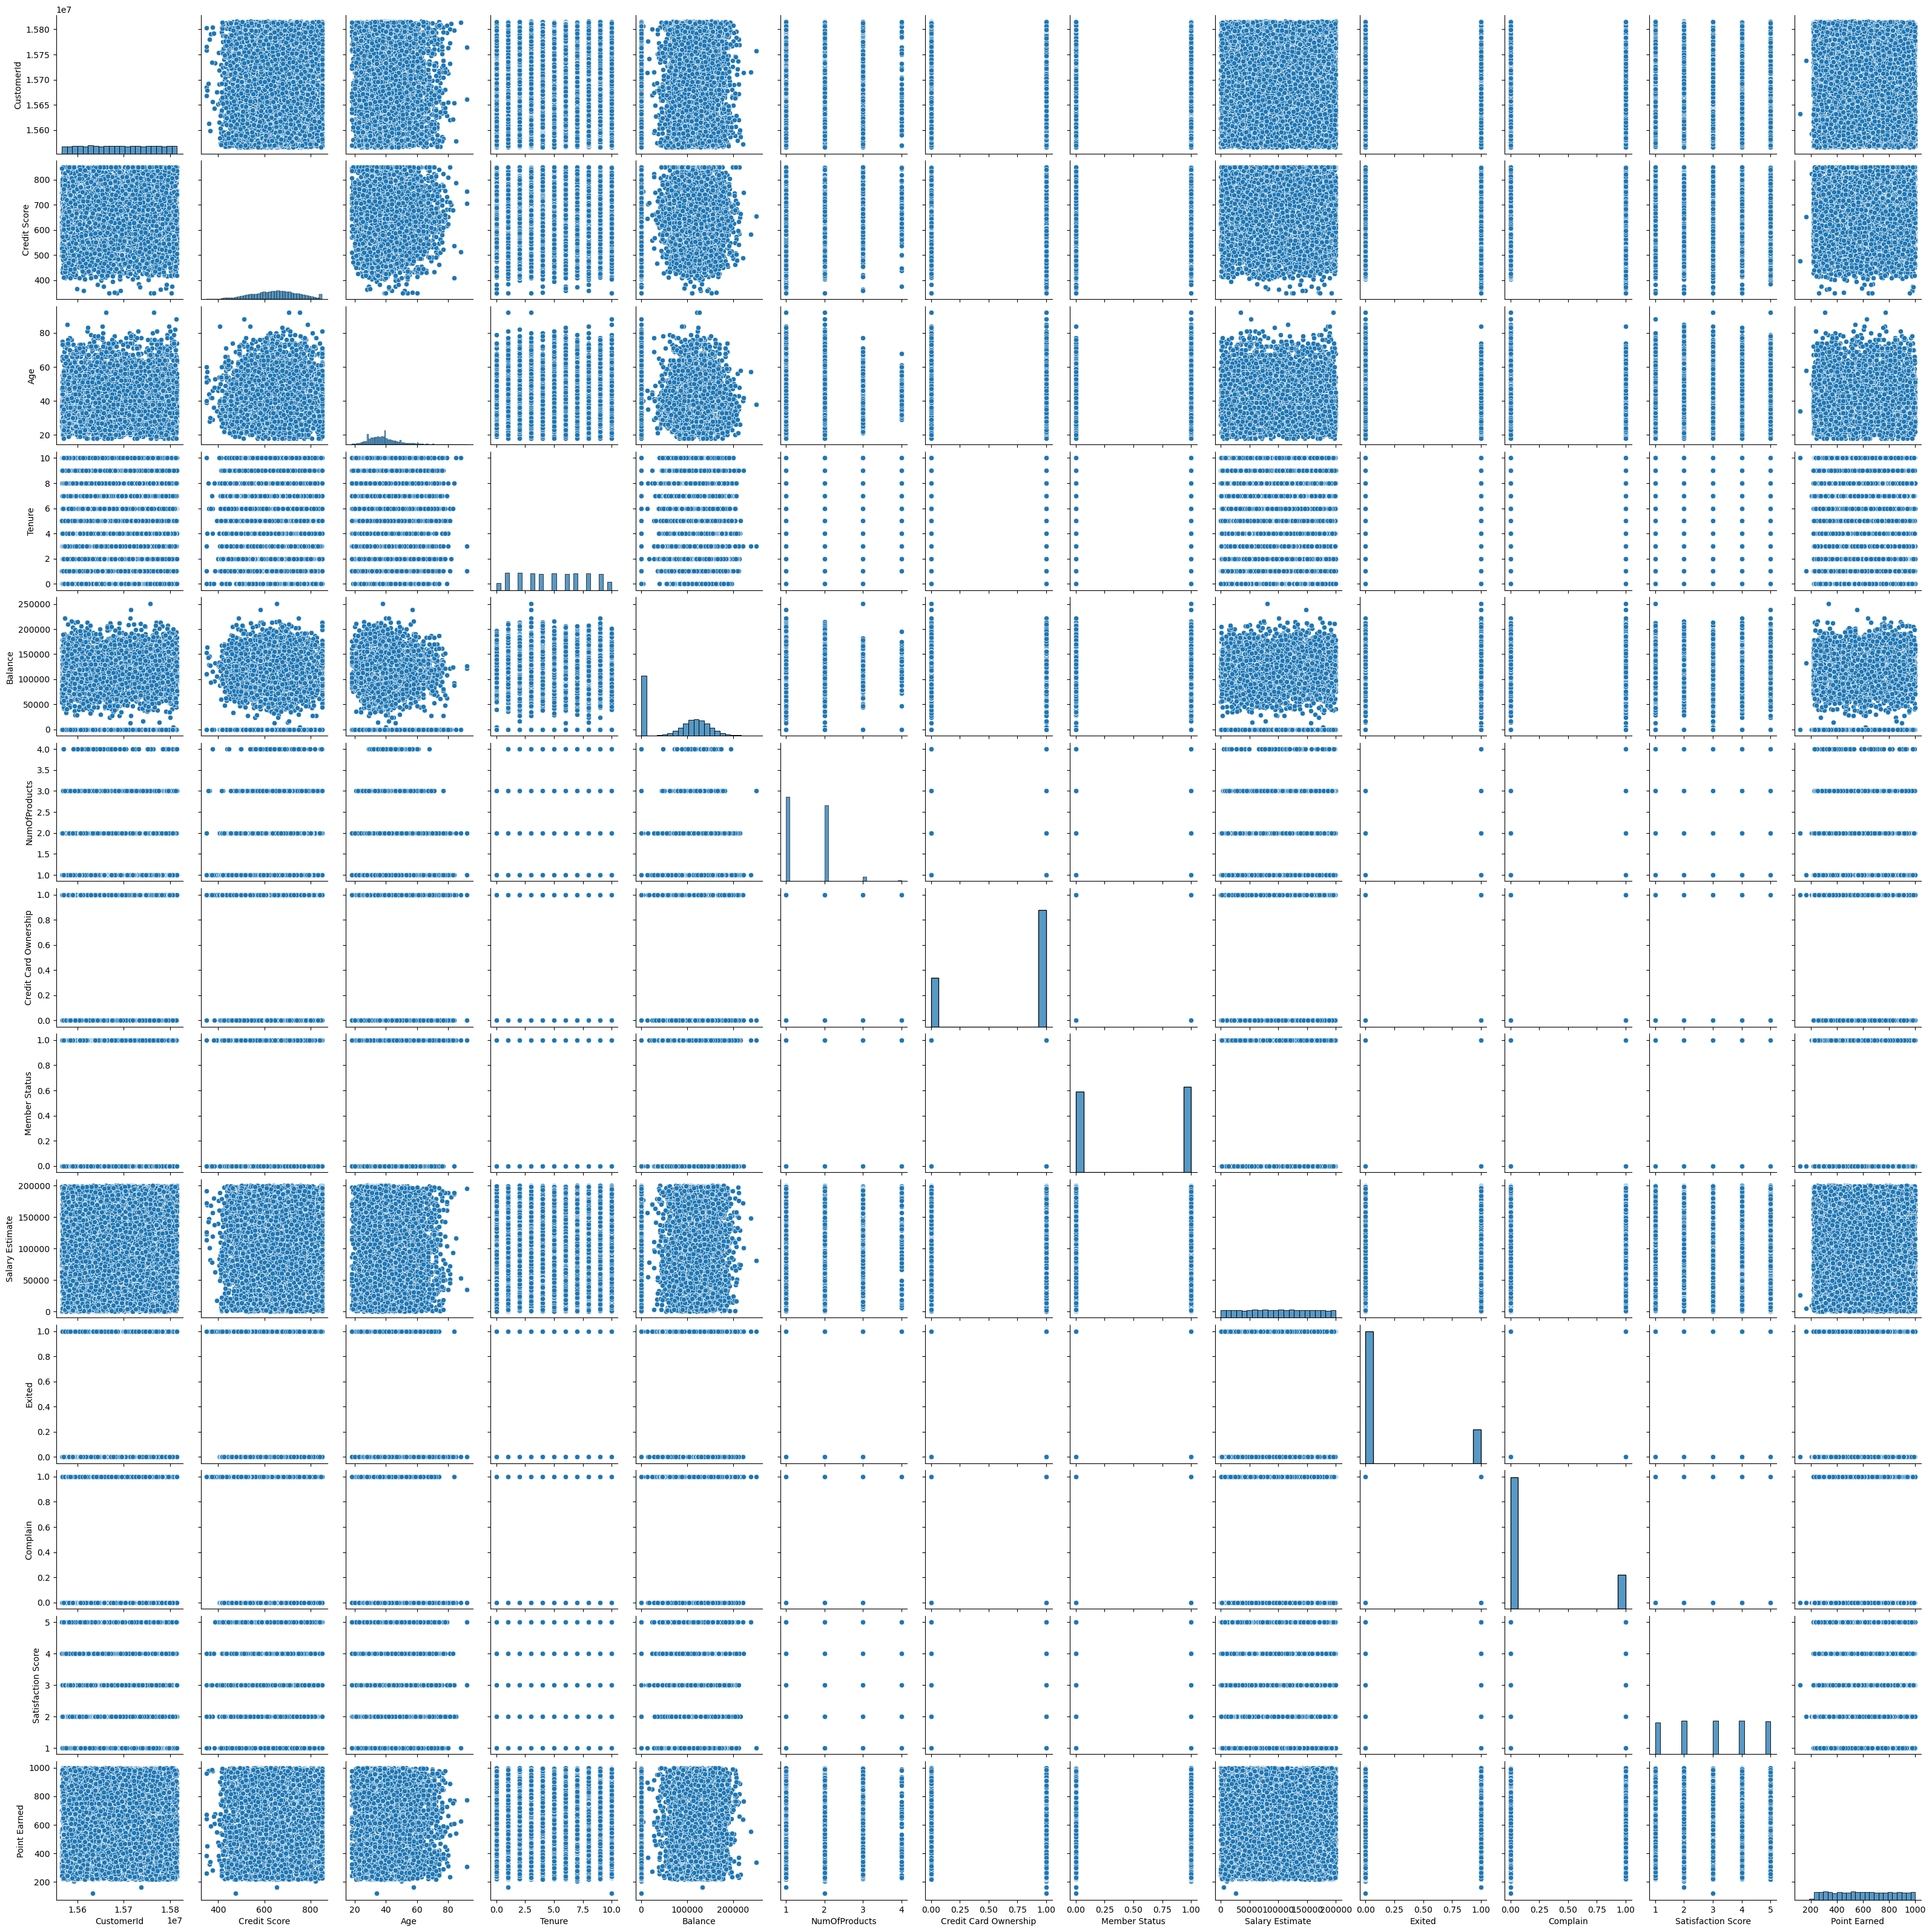

In [12]:
## multivariate analysis

sb.pairplot(df, dropna=True)
plt.grid(True)

### Building the client churn prediction model.

In [13]:
## Removing unwanted columns 

df = df.drop(["CustomerId", "Surname", "Country", "Gender", "Card Type"], axis = 1)

df.shape

(10000, 12)

In [14]:
## defining the dependent and independent variables

X = df.drop(columns = ["Exited"])
y = df["Exited"]

In [24]:
## dividing into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 25)

In [16]:
## scaling the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
## loading the model 

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
## checking for coefficients

log_reg.coef_

array([[ 0.16794786,  0.50303446,  0.06877917,  0.13331228, -0.13819346,
         0.15454139, -0.59220182,  0.19554633,  5.17028609, -0.00663664,
        -0.17096858]])

In [19]:
## checking for the intercept 

log_reg.intercept_

array([-4.56626033])

In [20]:
## predicting the model

pred = log_reg.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
## checking for the model accuracy using the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[2010,    7],
       [   1,  482]], dtype=int64)

In [22]:
## calculating the accuracy

(2010 + 482) / (2010 + 7 + 1 + 482)

0.9968

### Conclusion:

The model has an accuracy of 99.68% making it a good predictor of the bank's client churn.

### Application:

This model can be applied in other numerous situations like:
1. If a client is going to accept or reject a product.
2. Survey responses predictions.
3. Marketing campaign policy formulations etc.